# Задача
В ходе выполнения проекта необходимо решить задачу регрессии, обучив алгоритм предсказывать данные на существующем датасете.

In [74]:
from google.colab import drive
drive.mount('/content/gdrive')
 
%cd '/content/gdrive/My Drive/MMO2020/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/MMO2020


# Описание данных

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

В качестве набора данных будем использовать датасет с прогноза поступления в университет (Admission_Predict)
Будем решать задачу регрессии. В качестве целевого признака возьмем колонку "Шанс поступления" (Chance of Admit)

In [0]:
data=pd.read_csv("country-price.csv")

In [77]:
data.shape

(132, 7)

In [78]:
data.isna().sum()

Country                           0
Cost of Living Index              0
Rent Index                        0
Cost of Living Plus Rent Index    0
Groceries Index                   0
Restaurant Price Index            0
Local Purchasing Power Index      0
dtype: int64

Отсутствующих данных нет

# Разведочный анализ

In [79]:
data.head()

,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,Switzerland,122.40,50.25,87.89,120.27,123.01,119.53
1,Norway,101.43,36.15,70.21,91.14,109.28,88.38
2,Iceland,100.48,46.95,74.88,86.89,113.74,79.44
3,Japan,83.35,25.97,55.90,81.82,48.95,87.28
4,Denmark,83.00,31.92,58.57,61.74,100.75,100.88


In [80]:
data.describe()

,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,49.214697,18.089470,34.327273,42.583030,42.271439,50.324697
std,18.404922,12.808608,14.989052,17.302168,22.423585,27.357111
min,21.980000,4.030000,13.660000,17.700000,14.950000,2.180000
25%,35.295000,9.720000,23.117500,29.705000,25.117500,30.040000
50%,44.170000,13.610000,30.205000,37.405000,34.890000,42.555000
75%,60.717500,23.637500,43.590000,51.620000,53.140000,67.557500
max,122.400000,79.570000,87.890000,120.270000,123.010000,119.530000


In [81]:
data.columns

Index(['Country', 'Cost of Living Index', 'Rent Index',
       'Cost of Living Plus Rent Index', 'Groceries Index',
       'Restaurant Price Index', 'Local Purchasing Power Index'],
      dtype='object')

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         132 non-null    object 
 1   Cost of Living Index            132 non-null    float64
 2   Rent Index                      132 non-null    float64
 3   Cost of Living Plus Rent Index  132 non-null    float64
 4   Groceries Index                 132 non-null    float64
 5   Restaurant Price Index          132 non-null    float64
 6   Local Purchasing Power Index    132 non-null    float64
dtypes: float64(6), object(1)
memory usage: 7.3+ KB


Проверим корреляцию между признаками

# Корреляционный анализ, выбор подходящих признаков

In [0]:
data = data.drop(['Country'], axis=1)

In [0]:
corr = data.corr()

In [85]:
corr

,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
Cost of Living Index,1.000000,0.806902,0.970403,0.951387,0.920445,0.720407
Rent Index,0.806902,1.000000,0.925666,0.752065,0.744135,0.666903
Cost of Living Plus Rent Index,0.970403,0.925666,1.000000,0.916852,0.893776,0.734085
Groceries Index,0.951387,0.752065,0.916852,1.000000,0.809396,0.645898
Restaurant Price Index,0.920445,0.744135,0.893776,0.809396,1.000000,0.724025
Local Purchasing Power Index,0.720407,0.666903,0.734085,0.645898,0.724025,1.000000


Построим тепловую карту корреляции для более наглядного представления

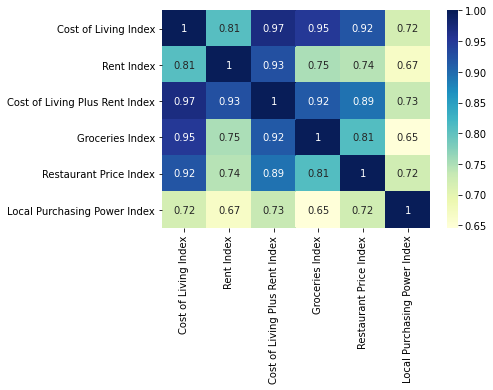

In [86]:
sns.heatmap(corr, cmap="YlGnBu", annot=True)

Построим графики, чтобы понять структуру данных

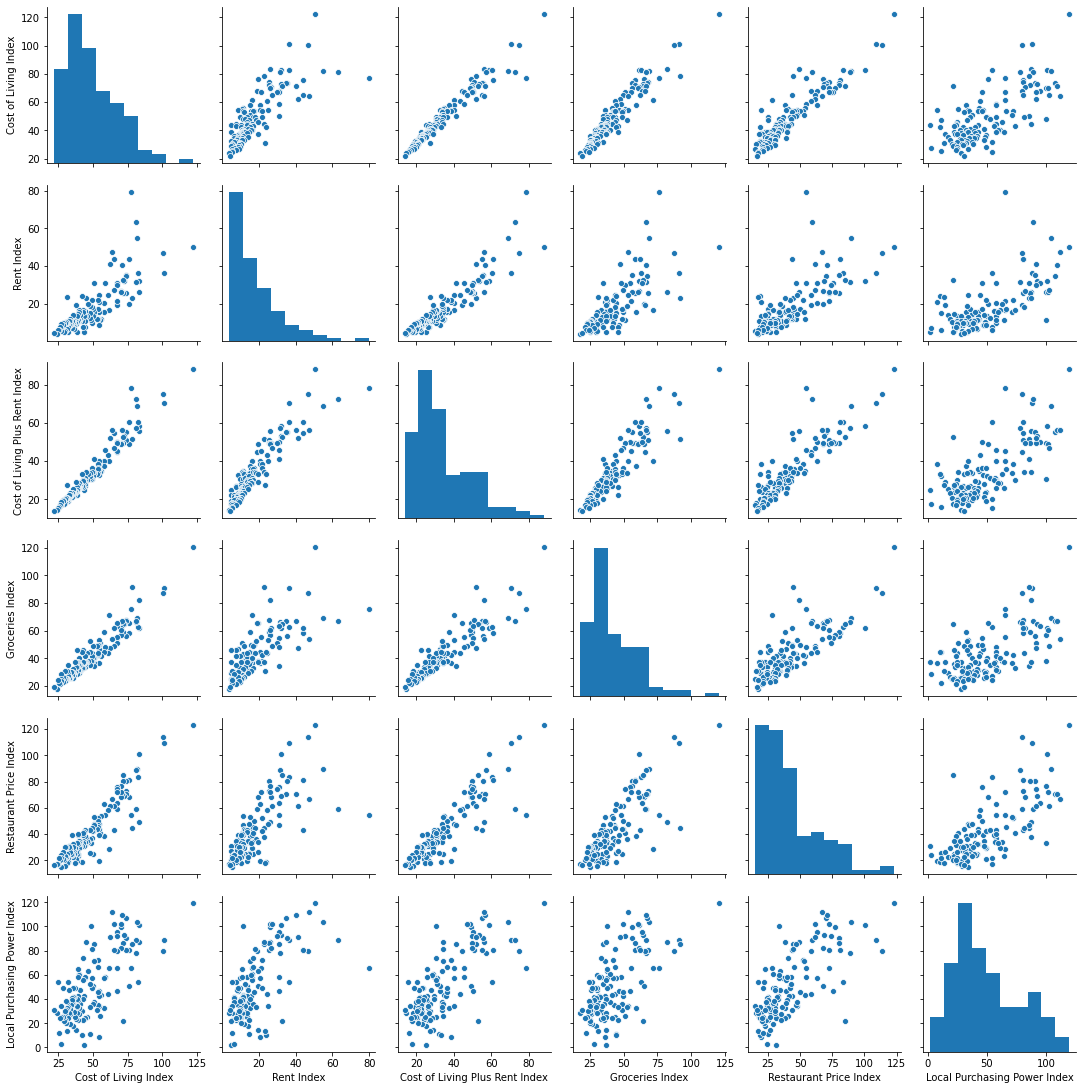

In [87]:
sns.pairplot(data)

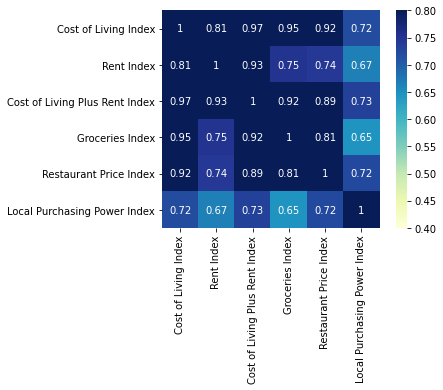

In [88]:
corr = data.corr()
sns.heatmap(corr, square=True, vmin=0.4, vmax=0.8,cmap="YlGnBu",annot=True)

Мы можем решать задачу регрессии, пытаясь предсказать шанс (%) поступления

Выделим целевой признак и нормализуем данные

In [0]:
target = data['Cost of Living Index']
data = data.drop(['Cost of Living Index'], axis=1)

In [0]:
from sklearn import preprocessing
data = preprocessing.scale(data)

# Метрики качества

В качестве метрик качества мы будет использовать среднюю квадратичную ошибку, среднюю абсолютную ошибку и коэффициент детерминации

Средняя квадратичная ошибка:   
$MAE(y,\hat{y}) = \frac{1}{N} \cdot \sum\limits_{i=1}^N \lvert y_i - \hat{y_i} \rvert $  
где:     
$y$ - истинное значение целевого признака  
$\hat{y}$ - предсказанное значение целевого признака  
$N$ - размер тестовой выборки   
Чем ближе значение к нулю, тем лучше качество регрессии.   
Основная проблема метрики состоит в том, что она не нормирована.  

Средняя абсолютная ошибка:   
$MSE(y,\hat{y}) = \frac{1}{N} \cdot \sum\limits_{i=1}^N ( y_i - \hat{y_i} )^2 $   
где:   
$y$ - истинное значение целевого признака   
$\hat{y}$ - предсказанное значение целевого признака   
$N$ - размер тестовой выборки   


Коэффициент детерминации:   
$R^2(y,\hat{y}) = 1 - \frac{\sum\limits_{i=1}^N ( y_i - \hat{y_i} )^2}{\sum\limits_{i=1}^N ( y_i - \overline{y_i} )^2} $    
где:   
$y$ - истинное значение целевого признака   
$\hat{y}$ - предсказанное значение целевого признака   
$N$ - размер тестовой выборки    
$\overline{y_i} = \frac{1}{N} \cdot \sum\limits_{i=1}^N y_i $    

In [0]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

# Выбор моделей

В качестве моделей регрессии выберем модель BaggingRegressor, KneighborsRegressor и RandomForestRegressor

In [0]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

# Формирование обучающей и тестовой выборки

разделим выборку в пропорции 1:4

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=1)

In [94]:
X_train.shape, y_train.shape

((105, 5), (105,))

In [95]:
X_test.shape, y_test.shape

((27, 5), (27,))

# Базовое решение для всех моделей

In [0]:
def quality(test, predicted):
    print("  Метрики качества:")
    print("     Средняя квадратичная ошибка: "+ str(mean_squared_error(test, predicted)))
    print("     Средняя абсолютная ошибка: "+ str(mean_absolute_error(test, predicted)))
    print("     Коэффициент детерминации: "+ str(r2_score(test, predicted)))

# Подбор гиперпараметров моделей

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate

### Подбор гиперпараметров для модели BaggingRegressor

In [98]:
param_grid = {
    'n_estimators' : [1, 3, 6, 9, 12, 15, 20, 25],
    'max_samples' : [0.05, 0.1, 0.2, 0.5],
    'max_features' : [1, 2, 3, 4]
}

bagging = BaggingRegressor()
grid = GridSearchCV(estimator=bagging, param_grid=param_grid)
grid.fit(X_train, y_train)
print(grid)

print(grid.best_score_)
print(grid.best_estimator_)

GridSearchCV(cv=None, error_score=nan,
             estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'max_features': [1, 2, 3, 4],
                         'max_samples': [0.05, 0.1, 0.2, 0.5],
                         'n_estimators': [1, 3, 6, 9, 12, 15, 20, 25]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.9467224743120207
BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=4, max_samples=0.5, n_estimators=15, n_jobs=None,


### Подбор параметров для KNeighborsRegressor

In [99]:
grid_params = {
    'n_neighbors': [3, 5, 11, 19],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(KNeighborsRegressor(), grid_params, verbose=1, cv=3, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid)

print(grid.best_score_)
print(grid.best_estimator_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 11, 19],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)
0.927201319378173
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='distance')


[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    1.3s finished


### Подбор параметров для RandomForestRegressor

In [100]:
grid_params= {
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [3, 5, 9, 12, 15],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4, 6]
}
grid = GridSearchCV(RandomForestRegressor(), grid_params, cv=2, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid)

print(grid.best_score_)
print(grid.best_estimator_)

GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

# Обучение с оптимальными значениями гиперпараметров

Обучение модели BaggingRegressor
  Метрики качества:
     Средняя квадратичная ошибка: 8.17934806518518
     Средняя абсолютная ошибка: 1.7569481481481466
     Коэффициент детерминации: 0.9675841916494802
Обучение модели KNeighborsRegressor
  Метрики качества:
     Средняя квадратичная ошибка: 21.658758153296187
     Средняя абсолютная ошибка: 3.2350509855263567
     Коэффициент детерминации: 0.9141635558467198
Обучение модели RandomForestRegressor
  Метрики качества:
     Средняя квадратичная ошибка: 10.347335474899296
     Средняя абсолютная ошибка: 2.317499523141467
     Коэффициент детерминации: 0.9589921787140284


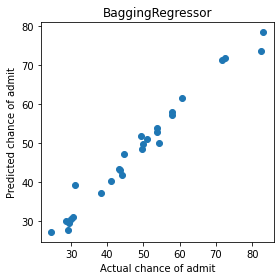

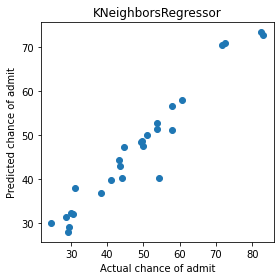

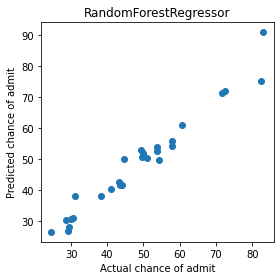

In [101]:
models = [BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=4, max_samples=0.5, n_estimators=25, n_jobs=None,
                 oob_score=False, random_state=None, verbose=0,
                 warm_start=False), 
          KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                    weights='distance'), 
          RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
         ]

for model in models:
    print("=========================================")
    print("Обучение модели "+type(model).__name__)
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    plt.figure(figsize=(4, 4))
    plt.scatter(y_test,predicted)
    plt.title(type(model).__name__)
    plt.xlabel('Actual chance of admit')
    plt.ylabel('Predicted chance of admit')
    plt.tight_layout()
    quality(y_test, predicted)

Лучшей оказалась первая модель.
Оптимизация гиперпараметров не дала большого эффекта. 

Метрики качества показывают, что все модели, построенные в результате выполнения проекта, являются достаточно хорошими для их использования. При этом ансамблевые методы показали себя лучше классического алгоритма

# Выводы
В ходе выполнения проекта по анализу данных был выбран датасет для решения задачи регрессии.   
Были выбраны 3 модели, входящие в пакет sci-kit learn, и метрики качества, подходящие для регрессионного анализа.    
В ходе разведочного анализа были удалены отсутствующие значения, сильно коррелирующие между собой признаки.  
После проведенной оптимизации параметров моделей был сделан вывод о лучшей модели для данной задачи. Ею оказалась модель случайного леса.